## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.8: plot a schematic IMF (for illustrative purposes only!)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline

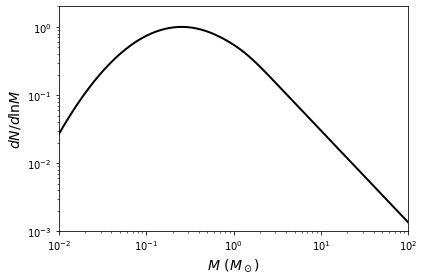

In [2]:
gamma = 2.35
mpeak = 0.06
sigma = 0.5
mp = 1.0

# mass range
m = np.logspace(-2.5,2.5,100)
logm = np.log10(m)
dndm = np.zeros(logm.size)

# gaussian in log m
g = np.exp(-(logm - np.log10(mpeak))**2/(2*sigma**2))
ip = np.argmin(np.abs(m-mp))

# power law tail
p = g[ip]*(mp/m)**gamma
p[:ip] = 0
g[ip:] = 0

# add them together and smooth over the rough edges...
dndm = g + p
dndm = gaussian_filter1d(dndm, sigma=3)
dndlnm = m*dndm
dndlnm /= dndlnm.max()
#print(m[np.argmax(dndlnm)])

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.set_xlim(0.01, 100)
ax.set_ylim(1e-3, 2)
ax.set_xlabel(r'$M\ (M_\odot)$', fontsize=14)
ax.set_ylabel(r'$dN/d{\rm ln}M$', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(m, dndlnm, color='black', lw=2, ls='-')

fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
plt.savefig('imf.pdf')